Epoch 1/100
500/500 [==============================] - 0s 118us/step - loss: 1.0708 - accuracy: 0.5100
Epoch 2/100
500/500 [==============================] - 0s 30us/step - loss: 0.5557 - accuracy: 0.8760
Epoch 3/100
500/500 [==============================] - 0s 28us/step - loss: 0.3772 - accuracy: 0.9400
Epoch 4/100
500/500 [==============================] - 0s 29us/step - loss: 0.3018 - accuracy: 0.9380
Epoch 5/100
500/500 [==============================] - 0s 32us/step - loss: 0.2656 - accuracy: 0.9360
Epoch 6/100
500/500 [==============================] - 0s 29us/step - loss: 0.2451 - accuracy: 0.9400
Epoch 7/100
500/500 [==============================] - 0s 29us/step - loss: 0.2309 - accuracy: 0.9460
Epoch 8/100
500/500 [==============================] - 0s 26us/step - loss: 0.2196 - accuracy: 0.9500
Epoch 9/100
500/500 [==============================] - 0s 28us/step - loss: 0.2118 - accuracy: 0.9420
Epoch 10/100
500/500 [==============================] - 0s 29us/step - loss: 0.20

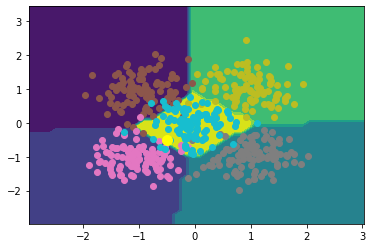

In [2]:
import numpy as np
import keras
from sklearn import datasets
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

n_pts = 500
centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state = 123, centers=centers, cluster_std=0.4)

plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

y_cat = to_categorical(y, 5)

model = Sequential()
model.add(Dense(5, input_shape=(2,), activation='softmax'))
model.compile(Adam(lr=0.1), 'categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X, y_cat, verbose=1, batch_size = 50, epochs=100)

def plot_multiclass_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict_classes(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

x = -0.5
y = -0.5

point = np.array([[x, y]])
prediction = model.predict_classes(point)
plt.plot([x], [y], marker='o', markersize=10, color="yellow")
print("Prediction is: ", prediction)